In [78]:
%pip install kagglehub # this is how you can import modules/libraries

411718.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install numpy==2.0.0

  Using cached numpy-2.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-2.0.0-cp312-cp312-macosx_11_0_arm64.whl (13.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install rembg


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pymatting

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub # we are using an api to import kagglehub's dataset

path = kagglehub.dataset_download("jafarhussain786/human-emotionshappy-faces")


path

/Users/upe/Desktop/aura/aura/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1'

In [5]:
%pip install opencv-python ipython

Note: you may need to restart the kernel to use updated packages.


In [64]:
'''
Resizing first: Ensures that all subsequent operations work on a consistent image size.
Setting the background to black next: Helps to clean up the image before grayscaling, making it more effective.
Grayscaling last: Keeps it optional, allowing for flexibility based on your needs.
'''

'\nResizing first: Ensures that all subsequent operations work on a consistent image size.\nSetting the background to black next: Helps to clean up the image before grayscaling, making it more effective.\nGrayscaling last: Keeps it optional, allowing for flexibility based on your needs.\n'

In [6]:
import cv2
import numpy as np
import rembg
from PIL import Image as PILImage

def resize_image(image, target_size=(224, 224)):
    """
    Resize the image to the target size while maintaining aspect ratio.
    Adds padding to ensure the output size is consistent.
    """
    h, w = image.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)
    new_w = int(w * scale)
    new_h = int(h * scale)

    resized_image = cv2.resize(image, (new_w, new_h))

    # Add padding to make it the target size
    top = (target_size[0] - new_h) // 2
    left = (target_size[1] - new_w) // 2

    # Create a black canvas and place the resized image on it
    canvas = np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)
    canvas[top:top+new_h, left:left+new_w] = resized_image

    return canvas

def remove_background(image):
    """
    Remove the background using rembg and return an image with a black background.
    """
    # Convert OpenCV image (BGR) to PIL image (RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = PILImage.fromarray(image_rgb)

    # Use rembg to remove the background
    image_no_bg = rembg.remove(pil_image)

    # Convert back to OpenCV image and replace transparent pixels with black
    image_no_bg_cv = np.array(image_no_bg)
    image_no_bg_cv = cv2.cvtColor(image_no_bg_cv, cv2.COLOR_RGB2BGR)

    # Replace transparent areas with black
    if image_no_bg_cv.shape[2] == 4:  # Check if alpha channel exists
        alpha_channel = image_no_bg_cv[:, :, 3]
        mask = alpha_channel == 0
        image_no_bg_cv = image_no_bg_cv[:, :, :3]  # Remove alpha channel
        image_no_bg_cv[mask] = [0, 0, 0]  # Set background to black

    return image_no_bg_cv

def preprocess_image(image, grayscale=True, target_size=(224, 224)):
    """
    Preprocess the image by resizing, removing the background, and converting to grayscale.
    """
    # Step 1: Resize the image
    image = resize_image(image, target_size)

    # Step 2: Remove the background and replace it with black
    image = remove_background(image)

    # Step 3: Convert to grayscale if specified
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image

# Display and save functions remain the same as before



In [7]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
from IPython.display import display, Image
from PIL import Image as PILImage
import io

image_files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
num_images_to_display = 10

Using image 1 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images26.jpg
Original Image 1:


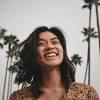

Image 1 after ETL:


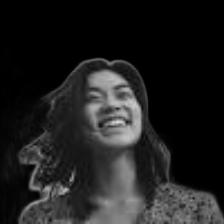

Using image 2 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images32.jpg
Original Image 2:


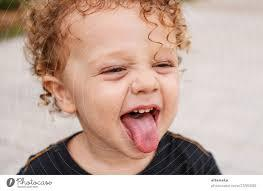

Image 2 after ETL:


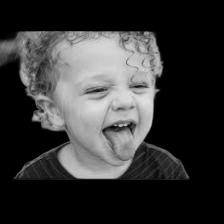

Using image 3 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/n-with-happy-face-expression-people-portraits-isolated-in-neutral-bac-W1FJB7.jpg
Original Image 3:


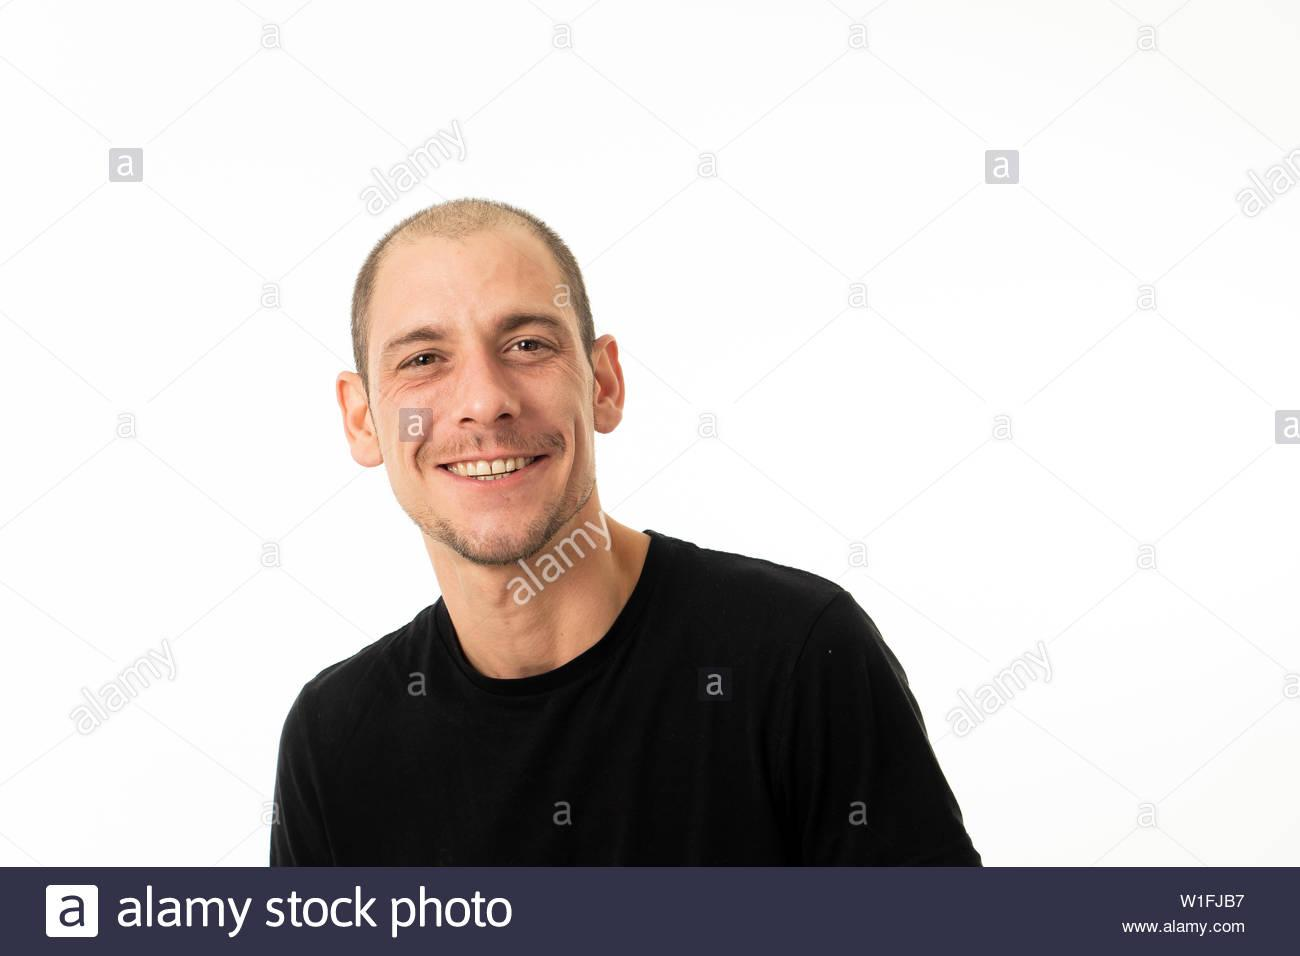

Image 3 after ETL:


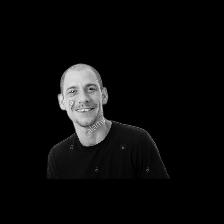

Using image 4 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/image22.jpeg
Original Image 4:


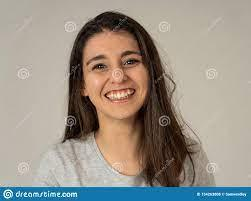

Image 4 after ETL:


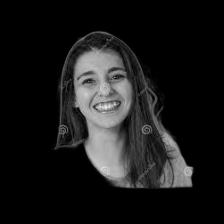

Using image 5 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/500_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg
Original Image 5:


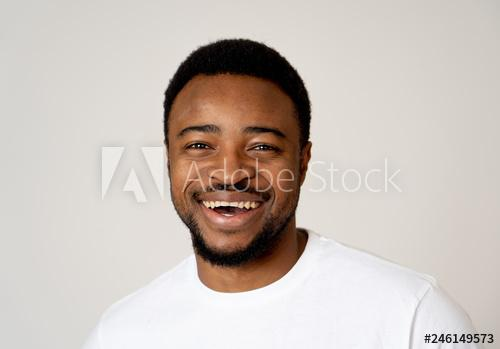

Image 5 after ETL:


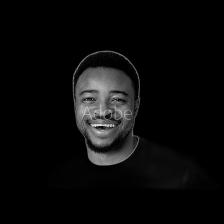

Using image 6 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/latin-woman-happy-face-beautiful-smile-isolated-neutral-background-154263808.jpg
Original Image 6:


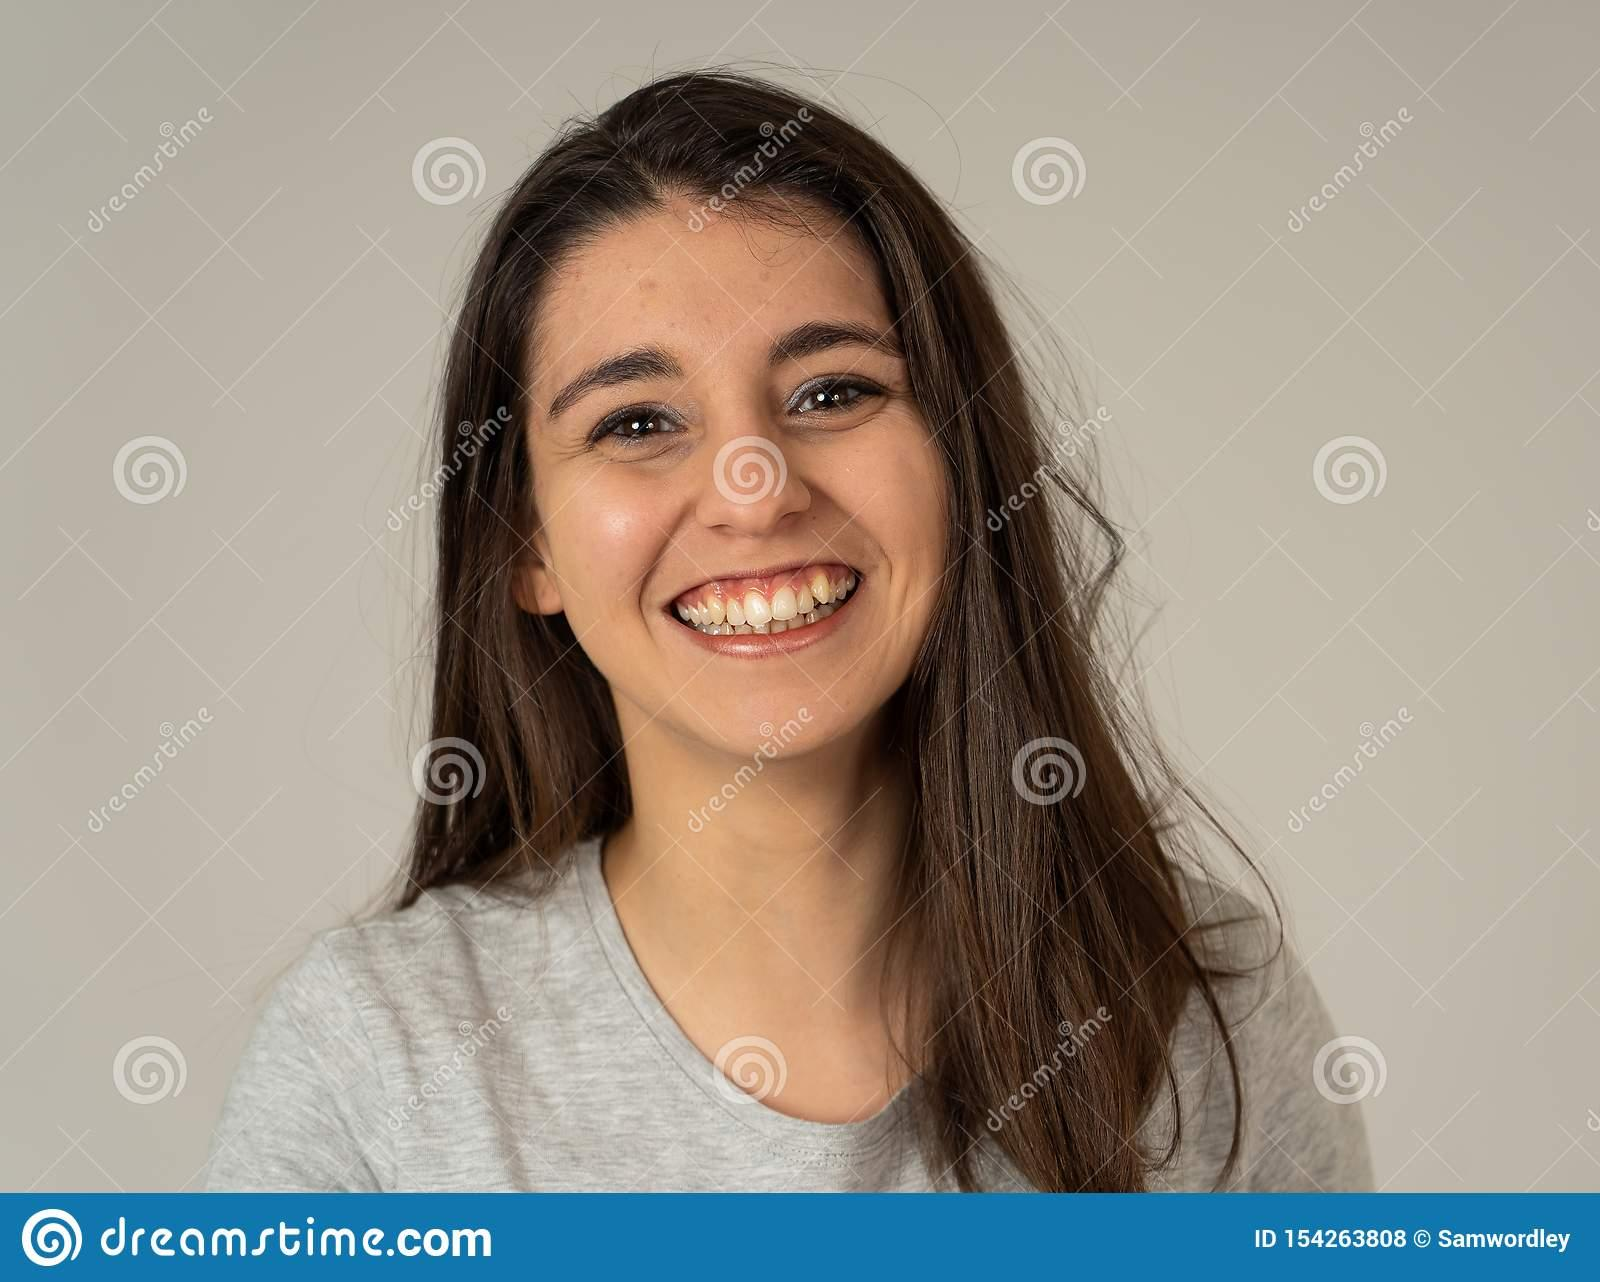

Image 6 after ETL:


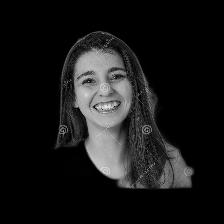

Using image 7 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images27.jpg
Original Image 7:


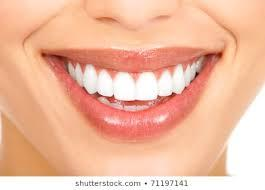

Image 7 after ETL:


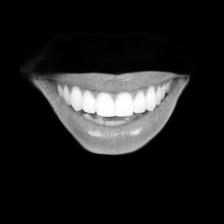

Using image 8 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/image18.jpeg
Original Image 8:


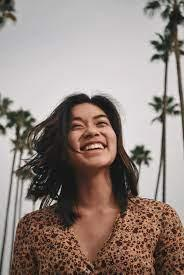

Image 8 after ETL:


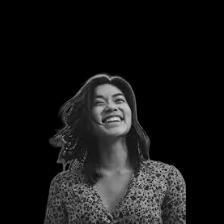

Using image 9 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/girl-smiling-happy-face-wallpaper-preview.jpg
Original Image 9:


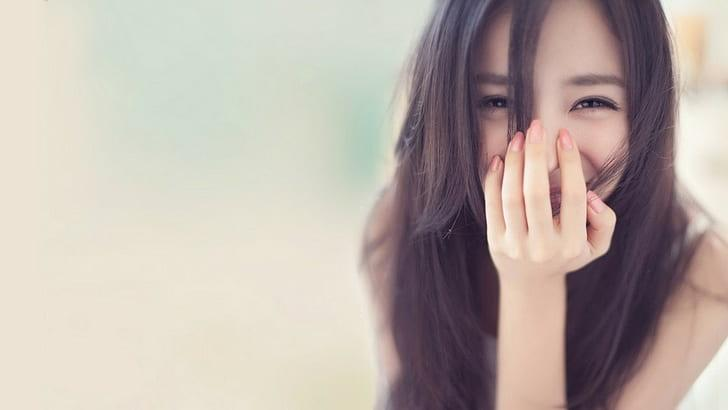

Image 9 after ETL:


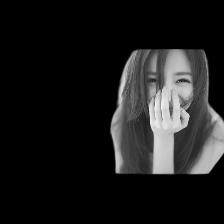

Using image 10 for testing: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images31.jpg
Original Image 10:


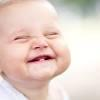

Image 10 after ETL:


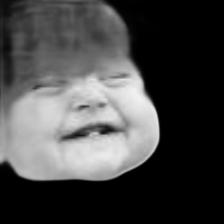

In [11]:
def show_images(num_images=1):
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(path, image_file)
        print(f"Using image {i+1} for testing: {image_path}")

        image = cv2.imread(image_path)

        original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        processed_image = preprocess_image(image)

        processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

        original_img_pil = PILImage.fromarray(original_image_rgb)
        buf_original = io.BytesIO()
        original_img_pil.save(buf_original, format='JPEG')
        buf_original.seek(0)

        processed_img_pil = PILImage.fromarray(processed_image_rgb)
        buf_processed = io.BytesIO()
        processed_img_pil.save(buf_processed, format='JPEG')
        buf_processed.seek(0)

        print(f"Original Image {i+1}:")
        display(Image(data=buf_original.getvalue()))

        print(f"Image {i+1} after ETL:")
        display(Image(data=buf_processed.getvalue()))

show_images(num_images_to_display)


In [10]:
output_dir = "processed_images"
os.makedirs(output_dir, exist_ok=True)

def save_processed_images(num_images=1):
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(path, image_file)
        print(f"Processing image {i+1}: {image_path}")

        image = cv2.imread(image_path)

        processed_image = preprocess_image(image)

        processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

        output_file_path = os.path.join(output_dir, f"processed_{i+1}.jpg")

        PILImage.fromarray(processed_image_rgb).save(output_file_path)

        print(f"Processed image saved to: {output_file_path}")

save_processed_images(num_images_to_display)


Processing image 1: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images26.jpg
Processed image saved to: processed_images/processed_1.jpg
Processing image 2: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/images32.jpg
Processed image saved to: processed_images/processed_2.jpg
Processing image 3: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/n-with-happy-face-expression-people-portraits-isolated-in-neutral-bac-W1FJB7.jpg
Processed image saved to: processed_images/processed_3.jpg
Processing image 4: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/image22.jpeg
Processed image saved to: processed_images/processed_4.jpg
Processing image 5: /Users/upe/.cache/kagglehub/datasets/jafarhussain786/human-emotionshappy-faces/versions/1/500_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg
Processed image saved to: processed_image